In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

In [2]:
import pdb
from scipy import integrate
from scipy import special
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from patch_geo_func import x_ep, y_ep
from sys import stdout
import warnings
warnings.filterwarnings(action="error", category=np.ComplexWarning)

In [3]:
from assign_attr import *
from repel_system import *

In [4]:
#LR_Pi_file = 'cortex_94-Ny/Ny-2-LR_Pi.bin'
#pos_file = 'server_data/test_3d_pos.bin'
#pos_file = 'server_data/test_low_3d_pos.bin'
LR_Pi_file = 'Ny-2-LR_Pi.bin'
pos_file = 'test_low_3d_pos.bin'
nblock = 32 #5209 #32
blockSize = 1024

a = 0.635
b = 96.7
k = np.sqrt(140)*0.873145
ecc = 2.0 # must consistent with the corresponding variables in parameter.m and macro.ipynb
p0 = -np.pi/2
p1 = np.pi/2

grid = np.array([64,104])*2
nx = grid[0]
ny = grid[1]
W = x_ep(ecc,0,k,a,b)
d = (1+2/nx)*W/nx
x = np.linspace(-W/nx, W+W/nx, nx)
W = W+2*W/nx
H = d*ny
y = np.linspace(-H/2, H/2, ny)
mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, pos_file, a, b, k, ecc, p0, p1)

211x342, ecc-polar grid houses 32768 neurons
require 0.086 GB


In [4]:
mMap.assign_pos_VF()

assgining visual field: 100.000%


array([[ 6.53472541e-02,  1.30344720e-01,  7.86498132e-02, ...,
         1.97205942e+00,  1.95754790e+00,  1.77860539e+00],
       [ 1.10154941e-16, -6.73792158e-01,  1.24189333e+00, ...,
         1.53591862e+00,  1.09598344e+00,  1.43274708e+00]])

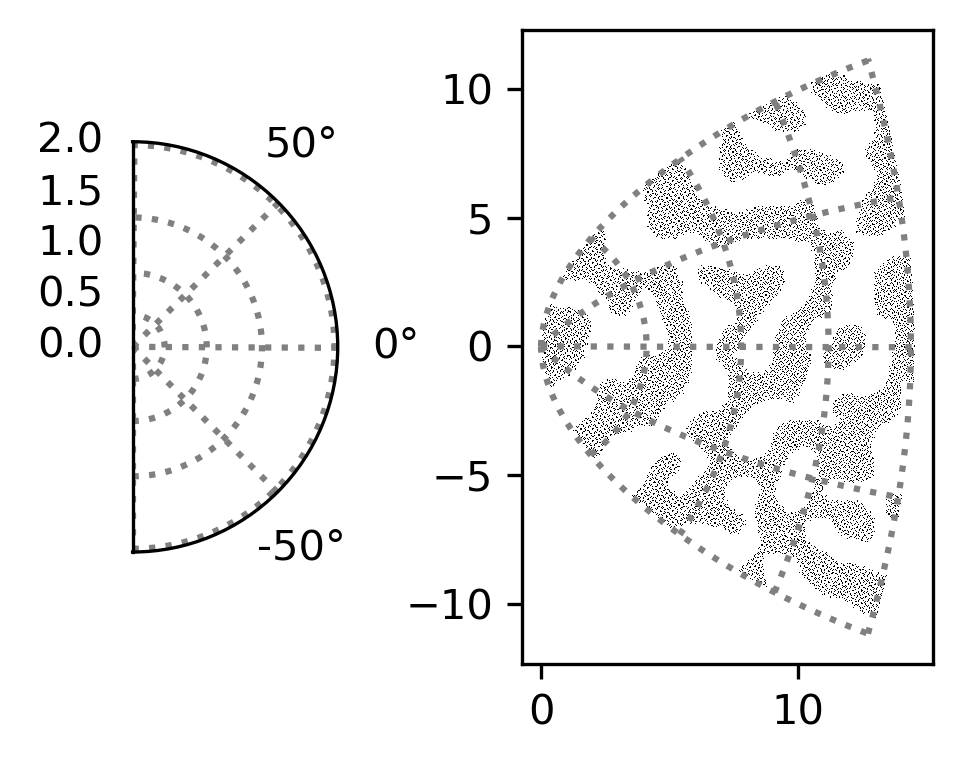

In [5]:
fig = plt.figure('macroMap',dpi=300)
ax1 = fig.add_subplot(131, projection='polar')
ax2 = fig.add_subplot(132)
#mMap.assign_pos_OD0()
#mMap.assign_pos_OD1()
mMap.plot_map(ax1,ax2,True,False)
ax1.set_thetamin(p0/np.pi*180)
ax1.set_thetamax(p1/np.pi*180)
ax1.set_rmax(2.0)
ax1.set_rmin(0.0)
ax1.grid(False)
ax1.tick_params(labelleft=False, labelright=True,
               labeltop=False, labelbottom=True)
#ax1.set_yticks([0,0.5,1.00,1.50,2.00])
ax2.set_aspect('equal')

2278 boundary points and 16374 particles initialized
get_acc: 100.000%

initialized

get_acc: 100.000%

2274 boundary points and 16394 particles initialized
get_acc: 100.000%

initialized

get_acc: 100.000%



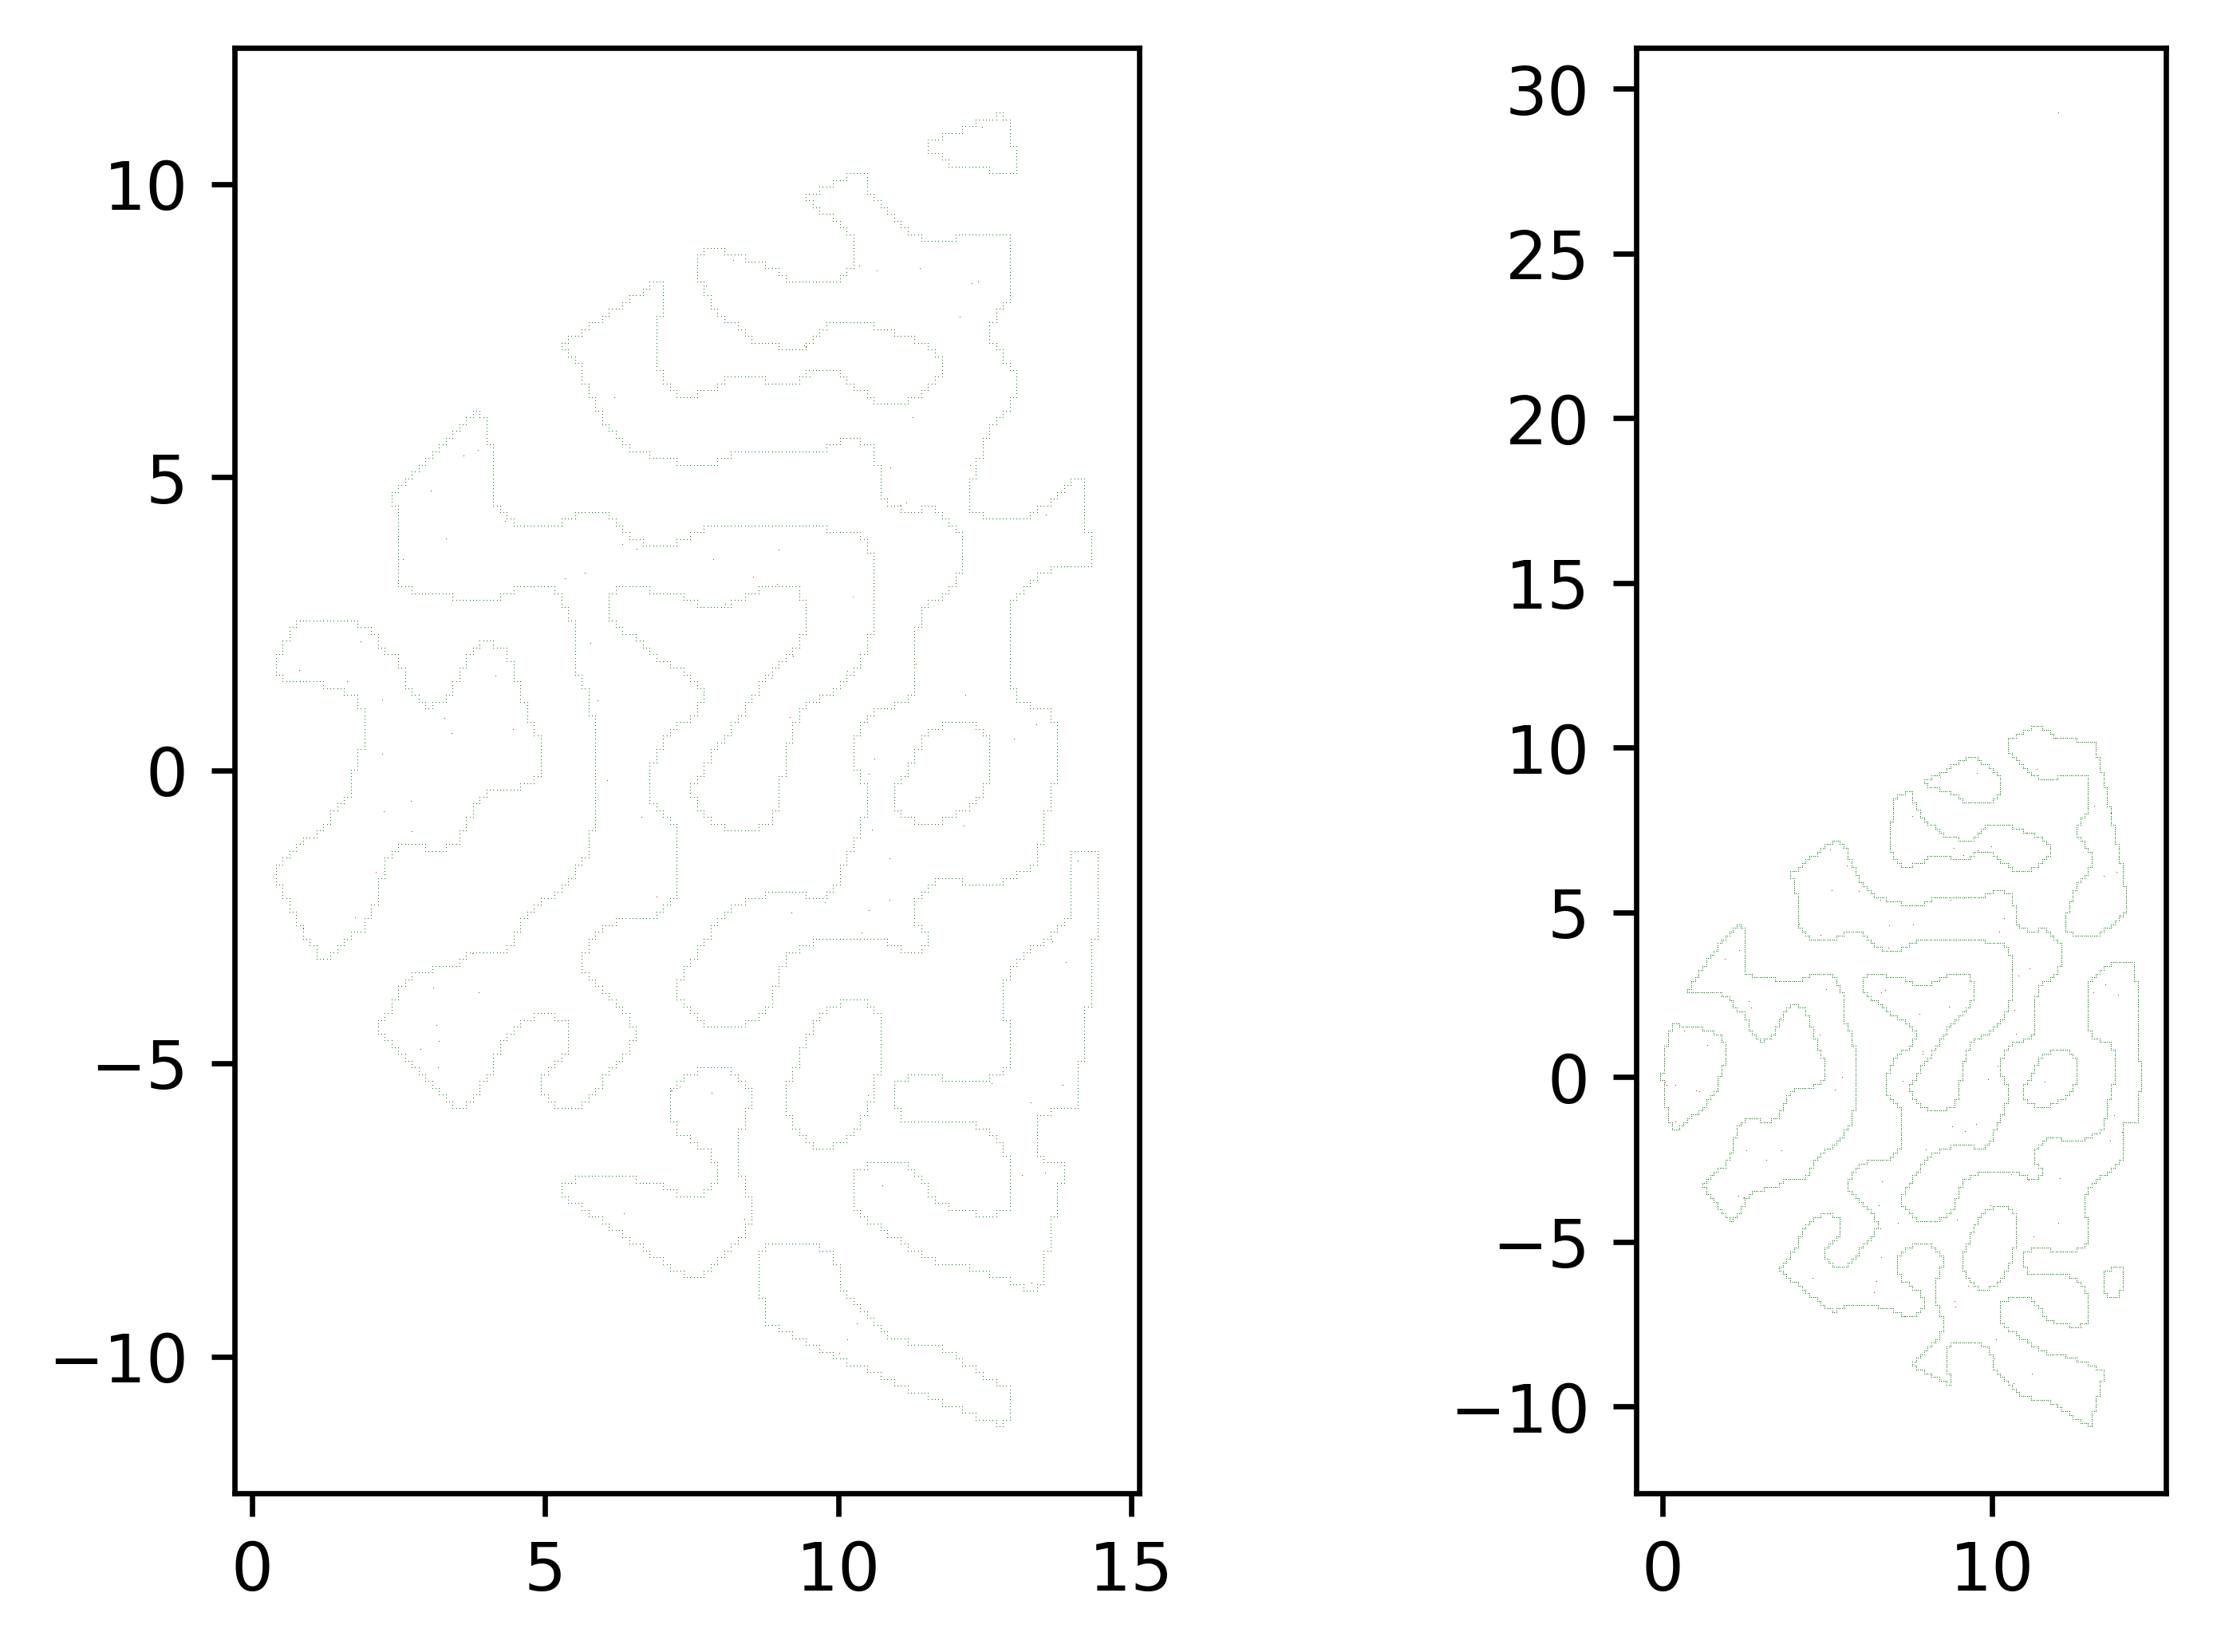

In [30]:
fig = plt.figure('vpos', dpi = 600)
ax1 = fig.add_subplot(121)
# reference grid
#ax1.plot(mMap.xx[0:2,0:2], mMap.yy[0:2,0:2],',r')
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122)
#ax2.plot(mMap.xx[mMap.LR == -1], mMap.yy[mMap.LR == -1],',k')
ax2.set_aspect('equal')
sposR, sposL = mMap.spread_pos(np.array([0.01]), ax1 = ax1, ax2 = ax2, seed = 17482321)

In [29]:
q = np.arange(2)
q[0], q[1], q[-1]

(0, 1, 1)

15


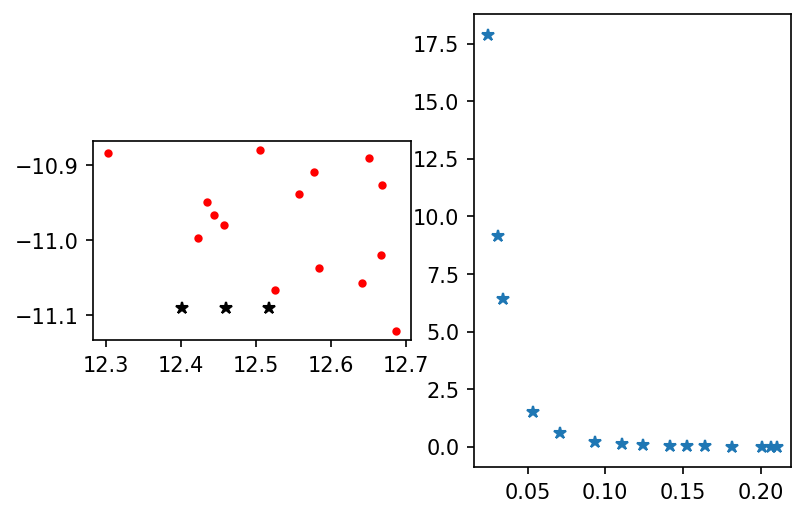

In [117]:
fig = plt.figure('tmp', dpi = 150)
ax = fig.add_subplot(121)
bp = np.array([[12.40147476, 12.45941308, 12.5173514], [-11.09057019, -11.09057019, -11.09057019]])
pos = np.array([[12.50544805,  12.66765508,  12.45678593,  12.43515833,  12.64062058, 12.68657924, 12.55681361, 12.58384811, 12.30268925, 12.44462041, 12.4229928, 12.65008266, 12.52572393, 12.66630336, 12.57708949], [-10.88030034, -10.92619593, -10.9797408, -10.94914373, -11.05623346, -11.12125222, -10.93766983, -11.03711029, -10.88412497, -10.96635458, -10.99695164, -10.88986192, -11.06579504, -11.01989944, -10.90898509]])
dis = np.array([0.21026985, 0.16437426, 0.11082939, 0.14142646, 0.03433673, 0.03068203, 0.15290036, 0.0534599, 0.20644522, 0.12421561, 0.09361855, 0.20070827, 0.02477515, 0.07067075, 0.18158511])
acc = np.array([2.82136074e-03, 1.95831344e-02, 1.15945101e-01, 4.14830587e-02, 6.39963570e+00, -9.13721099e+00, 2.85791776e-02, 1.53004080e+00, 3.55640194e-03, 7.31108313e-02, 2.20129052e-01, 4.80926786e-03, 1.78687759e+01, 5.97783419e-01, 1.07214685e-02])
print(dis.size)
ax.plot(bp[0,:],bp[1,:],'*k')
ax.plot(pos[0,:],pos[1,:],'.r')
ax.set_aspect('equal')
ax = fig.add_subplot(122)
ax.plot(dis,np.abs(acc),'*')

(0, 1)

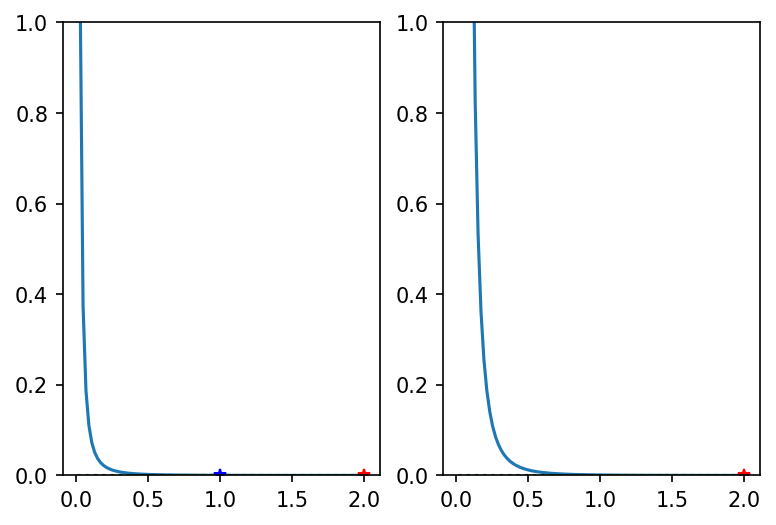

In [29]:
a = 0.001
b = 0.001
k1 = 2
k2 = 1
cl = 1
r0 = np.power(b*k2/a/k1,-1/(k1-k2))*cl
shift = a*np.power(cl/r0,k1) - b*np.power(cl/r0,k2)
ph = lambda r: a*np.power(cl/r,k1) - b*np.power(cl/r,k2) - shift
f = lambda r: a*k1/r*np.power(cl/r,k1) - b*k2/r*np.power(cl/r,k2)
epsilon = 0.01
top = 1
bottom = 0
n = 100
r = np.linspace(0,r0,n)+epsilon
fig = plt.figure('potential-force', dpi = 150)
ax1 = fig.add_subplot(121)
ax1.plot(r,ph(r))
ax1.plot(r0,ph(r0),'*r')
ax1.plot(cl,0,'*b')
ax1.plot(r,np.zeros((n,1)),':g')
ax1.set_ylim(bottom, top)
ax2 = fig.add_subplot(122)
ax2.plot(r,f(r))
ax2.plot(r0,f(r0), '*r')
ax2.plot(r,np.zeros((n,1)),':g')
ax2.set_ylim(bottom, top)

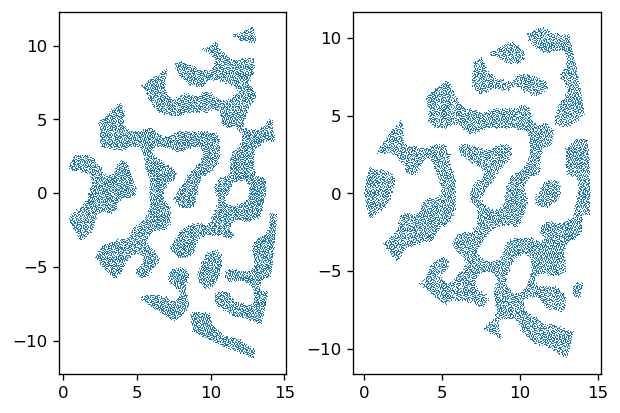

In [7]:
#fig = plt.figure('test', dpi = 120)
#ax1 = fig.add_subplot(121)
#ax1.plot(mMap.pos[0,mMap.ODlabel<0], mMap.pos[1,mMap.ODlabel<0],',')
#ax1.set_aspect('equal')
#ax2 = fig.add_subplot(122)
#ax2.plot(sposR[0,0,:], sposR[0,1,:],'.')
#ax2.set_aspect('equal')
ax1.plot(mMap.pos[0,mMap.ODlabel<0], mMap.pos[1,mMap.ODlabel<0],',')
ax2.plot(mMap.pos[0,mMap.ODlabel>0], mMap.pos[1,mMap.ODlabel>0],',')

In [36]:
sposR[0,0,:] - sposR[1,0,:]

array([-4.59700011e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.30856507e-08,  0.00000000e+00,  0.00000000e+00,  9.98076644e-09,
        0.00000000e+00,  2.40647324e-09,  0.00000000e+00, -2.31461279e-07,
        0.00000000e+00,  3.30970362e-09,  2.14839613e-09,  0.00000000e+00,
        1.31289417e-07, -4.53214445e-04, -4.69767155e-07,  3.84944343e-09,
        0.00000000e+00, -2.57854005e-09, -3.38841949e-07,  0.00000000e+00,
        3.51115521e-07,  2.78137498e-06,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.87248419e-04, -7.22801374e-10,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.22482135e-06, -5.74934234e-09,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.23182597e-09,  0.00000000e+00, -1.94236732e-06,
        0.00000000e+00,  0.00000000e+00, -1.37814712e-06,  0.00000000e+00,
        0.00000000e+00, -

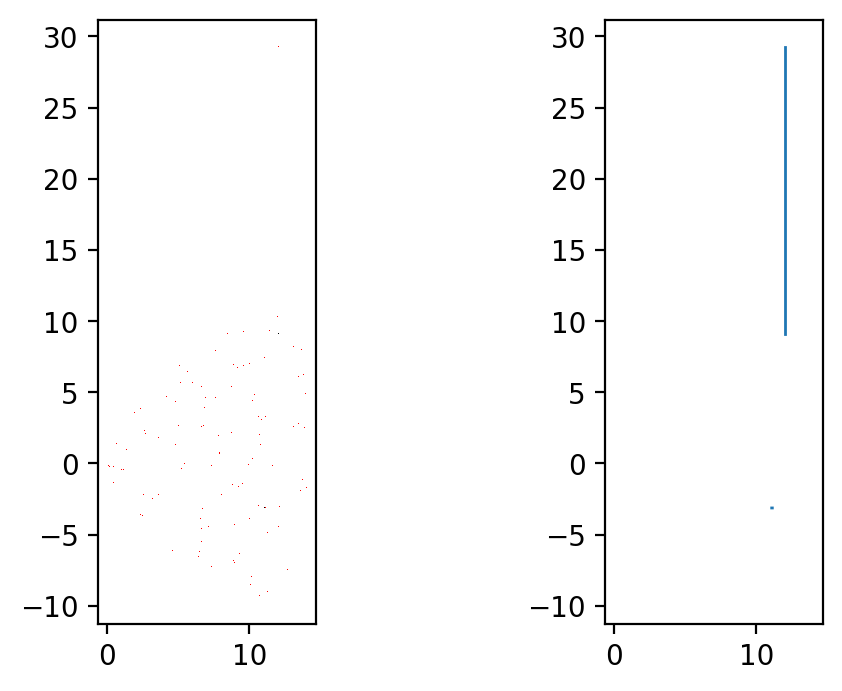

In [26]:
fig = plt.figure('test', dpi = 200)
ax1 = fig.add_subplot(121)
ax1.plot(sposR[0,0,:].squeeze(), sposR[0,1,:].squeeze(), ',k')
ax1.plot(sposR[1,0,:].squeeze(), sposR[1,1,:].squeeze(), ',r')
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122)
ax2.plot(sposR[:,0,:].squeeze(), sposR[:,1,:].squeeze(), lw = 1)
ax2.set_aspect('equal')

In [62]:
c = a-b
c.shape

(2, 2, 2)

a = (1,3), (2,4)

b = (11,13), (12,14)

In [63]:
c

array([[[-10, -11],
        [ -9, -10]],

       [[-10, -11],
        [ -9, -10]]])

In [74]:
c[:,1,[True,False]]

array([[-9],
       [-9]])

In [59]:
d = np.arange(3)
print(d)
d[[0,0,2]] = 0
print(d)

[0 1 2]
[0 1 0]


[0 0 2]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()